# Figrure 10.1

In [41]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pca

In [9]:
data = pd.read_csv(r'/home/hardik/repositories/An-Introduction-to-Statistical-Learning/data/USArrests.csv')
print(data.shape)
data.head()

(50, 5)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


This data contains states of US
- Name  - name of the states
- Murder - number of arrests for murder per million pop. 
- Assault - number of arrests for assaults per million pop.
- Urbanpop - percentage of population living in urban area
- Rape - number of rape cases per million population

In [10]:
X = data.iloc[:,1:] #removing the name col 
X.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [13]:
#scale the data , must before doing PCA
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# PCA

In [42]:
pc_analysis = PCA(n_components=2) # 2 for 2-D visualization
pc_analysis.fit(X_scaled)

PCA(n_components=2)

In [45]:
pca_components = pc_analysis.transform(X_scaled)
pca_components.shape # 50 obs represented as 2 features(principal components)

(50, 2)

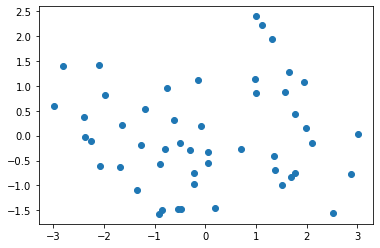

In [46]:
# plotting the data in principal components 
df = pd.DataFrame(pca_components,columns = ['pc_1','pc_2'])
plt.scatter(df['pc_1'],df['pc_2']) 
#although we can't get much insights from this graph.

sources - https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

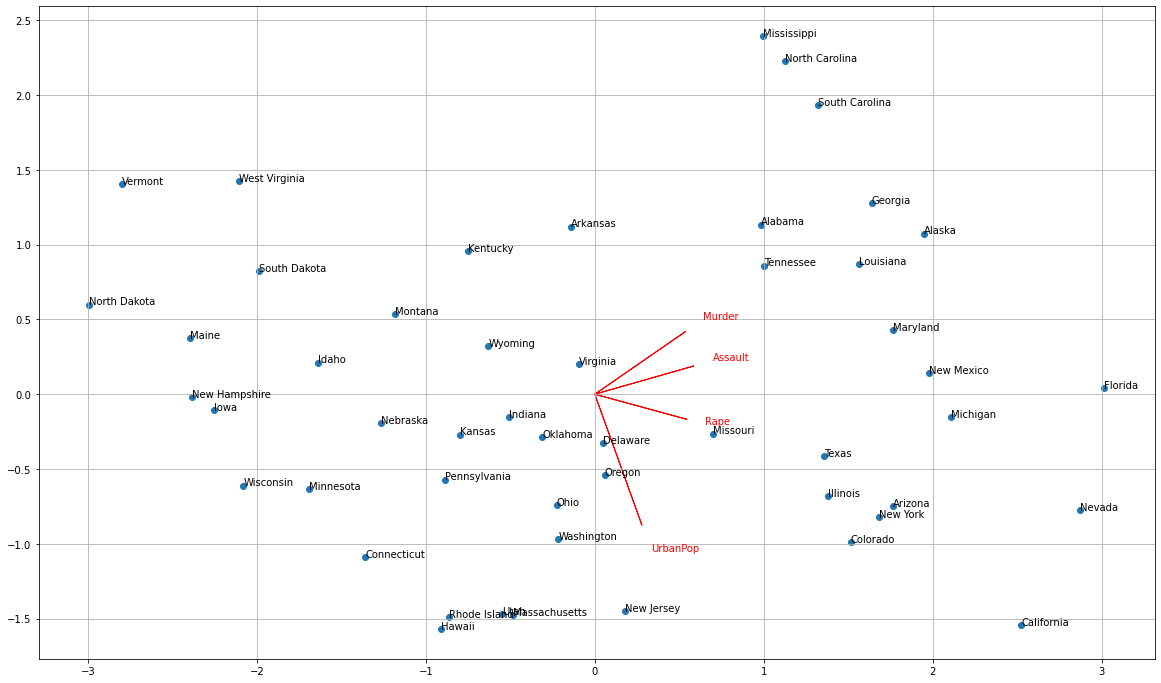

In [64]:
fig, ax = plt.subplots(figsize = (20,12))
ax.grid(True)
ax.scatter(df['pc_1'],df['pc_2'])

names = list(data.iloc[:,0])

for i, txt in enumerate(names):
    ax.annotate(txt, (df['pc_1'][i], df['pc_2'][i]))
    
xvector = pc_analysis.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pc_analysis.components_[1]

xs = pc_analysis.transform(X_scaled)[:,0] # see 'prcomp(my_data)$x' in R
ys = pc_analysis.transform(X_scaled)[:,1]


## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i], yvector[i],
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*1.2, yvector[i]*1.2,
             list(X.columns.values)[i], color='r')    

We can see that the graph we have here has directions of the loadings similar to the one in the book, if if look it relative to the data points.

We can make certain insights from it - 
- We can see that Murder, Assualt, Rape are in the same direction
- If we go in direction of any line, say assault, then number of assaults will increase as we go in that direction, 
and if we go in the opposite direction to it, the number of assaults will decrease.
- States lying in the upper right corner have higher number of murder cases and urban population
- States lying in the upper left corner have lower crime as well as lower urban population.
- States lying in the lower left part have low crime rates but higher urban population
- States lying in the lower right part have high crime rates as well as high urban population.

I would like to live in the states mentioned in lower left side...What about you?

In [35]:
pc_analysis.components_

array([[ 0.04170432,  0.99522128,  0.04633575,  0.0751555 ],
       [ 0.04482166,  0.05876003, -0.97685748, -0.20071807]])

The first principal component is highly dependent on second feature, while the second principal component is highly dependent on third feature (urban population)

In [67]:
# the first principal compenent explains most of the variation in the data
pc_analysis.explained_variance_ratio_

array([0.62006039, 0.24744129])

# To plot the loadings using pca library

use "pip install pca"
I was not able to install it through conda

In [56]:
pca_lib = pca.pca(n_components=2)

In [58]:
results = pca_lib.fit_transform(X_scaled)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


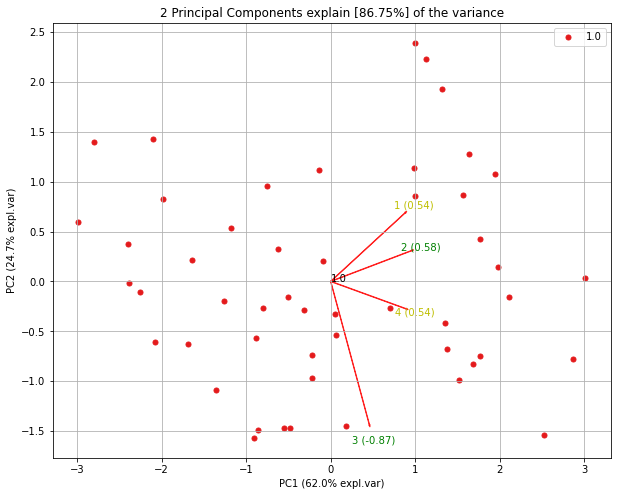

In [66]:
fig, ax = pca_lib.biplot(n_feat=4)
# the above one looked better..

## (Optional) For further analysis, we can use clustering on this data to form clusters of states which are similar in properties.